# Data Science Engineering Methods and Tools- Food Inspections Final Project: Group 2

## Name: Kanishk Tawde and Louis Ieong

This project investigates the trade balances of the United States compared to the top 10 world economies over the past 30 years using IMF trade data. We aim to identify whether the U.S. trade deficit is an outlier and whether such persistent deficits are economically alarming. The project will analyze trade trends, visualize comparative deficits/surpluses, and use forecasting models to predict future balances.

Trade in goods includes all goods which add to, or subtract from, the stock of material resources of a country by entering its economic territory (imports) or leaving it (exports). Goods are physical, produced items over which ownership rights can be established and whose economic ownership can be passed from one institutional unit to another by engaging in transactions. Goods being transported through a country or temporarily admitted or withdrawn (except for goods for inward or outward processing) are not included.

## Data Source:

IMF – Trade in Goods Datasets The International Monetary Fund datasets with filters on international trade- https://data.imf.org/en/datasets/IMF.STA:ITG

## Hypothesis:

## Main Hypothesis:

The U.S. trade deficit is significantly larger and growing faster than other major economies, and the trend may be economically concerning.

## Sub-Questions:

How does the U.S. trade balance trend compare to China, Germany, Japan, and other top economies?

Are other large economies experiencing similar deficits or surpluses?

Can we predict the future U.S. trade balance based on current trends, and how stable is it?

Are there global events that show similar impact across all major economies?

# Installing Libraries

In [3]:
#Installing Libraries
!pip install numpy  
!pip install pandas  
!pip install matplotlib  
!pip install seaborn  
!pip install pymc  
!pip install arviz

# Importing Libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pymc as pm
import arviz as az


# Loading the Dataset

In [3]:
#loading the dataset
file_path = "dataset.csv"
df = pd.read_csv(file_path)

# Data Preview

In [4]:
print("Dataset preview:")
display(df)
print("Dataset first 5 rows:")
display(df.head())

Dataset preview:


COUNTRY         INDICATOR  \
0                         Romania  Exports of goods   
1          Lithuania, Republic of  Imports of goods   
2             Lesotho, Kingdom of  Imports of goods   
3    North Macedonia, Republic of  Exports of goods   
4                        Pakistan  Imports of goods   
..                            ...               ...   
390                       Germany  Exports of goods   
391                       Germany  Imports of goods   
392           Latvia, Republic of  Exports of goods   
393           Latvia, Republic of  Imports of goods   
394               Slovak Republic  Imports of goods   

                      TYPE_OF_TRANSFORMATION FREQUENCY      SCALE       1994  \
0             Free on board (FOB), US dollar    Annual   Millions     6151.0   
1    Cost insurance freight (CIF), US dollar    Annual   Millions     2350.0   
2    Cost insurance freight (CIF), US dollar    Annual   Millions        NaN   
3             Free on board (FOB), US dollar    Annual  Thousands  1086000.0   
4    Cost insurance freight (CIF), US dollar    Annual   Millions        NaN   
..                                       ...       ...        ...        ...   
390           Free on board (FOB), US dollar    Annual   Millions   426935.0   
391  Cost insurance freight (CIF), US dollar    Annual   Millions   381388.0   
392           Free on board (FOB), US dollar    Annual   Millions      991.0   
393  Cost insurance freight (CIF), US dollar    Annual   Millions     1251.0   
394  Cost insurance freight (CIF), US dollar    Annual   Millions     6610.0   

          1995       1996       1997       1998  ...          2014  \
0       7910.0     8085.0     8431.0     8300.0  ...  6.972600e+04   
1       3650.0     4560.0     5645.0     5795.0  ...  3.436000e+04   
2          NaN        NaN        NaN        NaN  ...  1.631391e+03   
3    1204000.0  1147000.0  1237000.0  1311000.0  ...  4.968000e+06   
4          NaN        NaN        NaN        NaN  ...  4.747584e+04   
..         ...        ...        ...        ...  ...           ...   
390   523461.0   524649.0   512891.0   543752.0  ...  1.494214e+06   
391   463872.0   459098.0   445731.0   471474.0  ...  1.207192e+06   
392     1305.0     1443.0     1672.0     1811.0  ...  1.471400e+04   
393     1818.0     2320.0     2721.0     3191.0  ...  1.796300e+04   
394     8770.0    11125.0    11725.0    13078.0  ...  8.154900e+04   

             2015          2016          2017          2018          2019  \
0    6.059600e+04  6.353400e+04  7.076300e+04  7.966100e+04  7.687200e+04   
1    2.815400e+04  2.737600e+04  3.226100e+04  3.650300e+04  3.576000e+04   
2    1.574002e+03  1.610188e+03  2.061143e+03  1.675524e+03  2.321318e+03   
3    4.535000e+06  4.791000e+06  5.668000e+06  6.912000e+06  7.189000e+06   
4    4.379511e+04  4.679864e+04  5.721111e+04  5.986536e+04  4.993142e+04   
..            ...           ...           ...           ...           ...   
390  1.326205e+06  1.334356e+06  1.448191e+06  1.560538e+06  1.489411e+06   
391  1.051131e+06  1.055327e+06  1.162907e+06  1.284351e+06  1.233978e+06   
392  1.228600e+04  1.229400e+04  1.412600e+04  1.616700e+04  1.570500e+04   
393  1.471900e+04  1.443500e+04  1.703200e+04  1.968100e+04  1.895700e+04   
394  7.283700e+04  7.467800e+04  8.161600e+04  9.290100e+04  9.000100e+04   

             2020          2021          2022       2023  
0    7.071800e+04  8.738700e+04  9.669900e+04   100612.0  
1    3.332900e+04  4.448800e+04  5.509400e+04    48487.0  
2    1.392414e+03  1.822901e+03  1.855613e+03        NaN  
3    6.641000e+06  8.184000e+06  8.727000e+06  8998000.0  
4    4.575259e+04           NaN           NaN        NaN  
..            ...           ...           ...        ...  
390  1.382534e+06  1.627377e+06  1.676470e+06  1702278.0  
391  1.171782e+06  1.411439e+06  1.583618e+06  1467598.0  
392  1.633800e+04  2.083200e+04  2.410200e+04    22649.0  
393  1.844200e+04  2.444500e+04  2.949900e+04   

Dataset first 5 rows:


COUNTRY         INDICATOR  \
0                       Romania  Exports of goods   
1        Lithuania, Republic of  Imports of goods   
2           Lesotho, Kingdom of  Imports of goods   
3  North Macedonia, Republic of  Exports of goods   
4                      Pakistan  Imports of goods   

                    TYPE_OF_TRANSFORMATION FREQUENCY      SCALE       1994  \
0           Free on board (FOB), US dollar    Annual   Millions     6151.0   
1  Cost insurance freight (CIF), US dollar    Annual   Millions     2350.0   
2  Cost insurance freight (CIF), US dollar    Annual   Millions        NaN   
3           Free on board (FOB), US dollar    Annual  Thousands  1086000.0   
4  Cost insurance freight (CIF), US dollar    Annual   Millions        NaN   

        1995       1996       1997       1998  ...          2014  \
0     7910.0     8085.0     8431.0     8300.0  ...  6.972600e+04   
1     3650.0     4560.0     5645.0     5795.0  ...  3.436000e+04   
2        NaN        NaN        NaN        NaN  ...  1.631391e+03   
3  1204000.0  1147000.0  1237000.0  1311000.0  ...  4.968000e+06   
4        NaN        NaN        NaN        NaN  ...  4.747584e+04   

           2015          2016          2017          2018          2019  \
0  6.059600e+04  6.353400e+04  7.076300e+04  7.966100e+04  7.687200e+04   
1  2.815400e+04  2.737600e+04  3.226100e+04  3.650300e+04  3.576000e+04   
2  1.574002e+03  1.610188e+03  2.061143e+03  1.675524e+03  2.321318e+03   
3  4.535000e+06  4.791000e+06  5.668000e+06  6.912000e+06  7.189000e+06   
4  4.379511e+04  4.679864e+04  5.721111e+04  5.986536e+04  4.993142e+04   

           2020          2021          2022       2023  
0  7.071800e+04  8.738700e+04  9.669900e+04   100612.0  
1  3.332900e+04  4.448800e+04  5.509400e+04    48487.0  
2  1.392414e+03  1.822901e+03  1.855613e+03        NaN  
3  6.641000e+06  8.184000e+06  8.727000e+06  8998000.0  
4  4.575259e+04           NaN           NaN        NaN  

[5 rows x 35 columns]

# Normalize Trade Values

In [6]:
# Function to normalize individual trade values to billions USD
def normalize_to_billions(value, scale):
    # Check if either the value or scale is missing (NaN); if so, return the value as-is
    if pd.isna(scale) or pd.isna(value):
        return value

    # Proceed only if the scale is a string
    if isinstance(scale, str):
        # Clean the scale string by removing spaces and converting to lowercase
        scale = scale.strip().lower()

        # If the scale is already in billions, no conversion needed
        if 'billions' in scale or 'billion' in scale:
            return value
        # If the scale is in millions, convert to billions by dividing by 1,000
        elif 'millions' in scale or 'million' in scale:
            return value / 1000
        # If the scale is in thousands, convert to billions by dividing by 1,000,000
        elif 'thousands' in scale or 'thousand' in scale:
            return value / 1000000
        # If the scale doesn't match any known unit, return the value as-is
        else:
            return value

    # If scale is not a string, return the value as-is
    return value


# Function to normalize all rows and year columns in the dataset
def normalize_all_data(df):
    # Create a copy of the original dataframe to avoid modifying it directly
    normalized_df = df.copy()
    
    # Identify all columns that represent years (e.g., '2000', '2015') by checking if column names are digits
    year_columns = [col for col in df.columns if col.isdigit()]
    
    # Iterate through each row in the dataframe
    for idx, row in normalized_df.iterrows():
        # Get the 'SCALE' value for the current row
        scale = row['SCALE']

        # Normalize all year column values in the current row based on its scale
        for year in year_columns:
            normalized_df.at[idx, year] = normalize_to_billions(row[year], scale)
    
    # Add a new column indicating that all values are now in billions
    normalized_df['NORMALIZED_SCALE'] = 'Billions'
    
    # Return the normalized dataframe
    return normalized_df


# Apply the normalization function to the entire dataset
df = normalize_all_data(df)
display(df)

# Print a confirmation message after normalization
print("Data has been normalized to billions USD for consistency")


COUNTRY         INDICATOR FREQUENCY      SCALE  \
0                         Romania  Exports of goods    Annual   Millions   
1          Lithuania, Republic of  Imports of goods    Annual   Millions   
2             Lesotho, Kingdom of  Imports of goods    Annual   Millions   
3    North Macedonia, Republic of  Exports of goods    Annual  Thousands   
4                        Pakistan  Imports of goods    Annual   Millions   
..                            ...               ...       ...        ...   
390                       Germany  Exports of goods    Annual   Millions   
391                       Germany  Imports of goods    Annual   Millions   
392           Latvia, Republic of  Exports of goods    Annual   Millions   
393           Latvia, Republic of  Imports of goods    Annual   Millions   
394               Slovak Republic  Imports of goods    Annual   Millions   

        1994     1995     1996     1997     1998     1999  ...         2015  \
0      6.151    7.910    8.085    8.431    8.300    8.518  ...    60.596000   
1      2.350    3.650    4.560    5.645    5.795    4.835  ...    28.154000   
2        NaN      NaN      NaN      NaN      NaN      NaN  ...     1.574002   
3      1.086    1.204    1.147    1.237    1.311    1.191  ...     4.535000   
4        NaN      NaN      NaN      NaN      NaN      NaN  ...    43.795106   
..       ...      ...      ...      ...      ...      ...  ...          ...   
390  426.935  523.461  524.649  512.891  543.752  543.539  ...  1326.205000   
391  381.388  463.872  459.098  445.731  471.474  474.047  ...  1051.131000   
392    0.991    1.305    1.443    1.672    1.811    1.723  ...    12.286000   
393    1.251    1.818    2.320    2.721    3.191    2.954  ...    14.719000   
394    6.610    8.770   11.125   11.725   13.078   11.318  ...    72.837000   

            2016         2017         2018         2019         2020  \
0      63.534000    70.763000    79.661000    76.872000    70.718000   
1      27.376000    32.261000    36.503000    35.760000    33.329000   
2       1.610188     2.061143     1.675524     2.321318     1.392414   
3       4.791000     5.668000     6.912000     7.189000     6.641000   
4      46.798639    57.211114    59.865361    49.931421    45.752589   
..           ...          ...          ...          ...          ...   
390  1334.356000  1448.191000  1560.538000  1489.411000  1382.534000   
391  1055.327000  1162.907000  1284.351000  1233.978000  1171.782000   
392    12.294000    14.126000    16.167000    15.705000    16.338000   
393    14.435000    17.032000    19.681000    18.957000    18.442000   
394    74.678000    81.616000    92.901000    90.001000    84.395000   

            2021         2022      2023  NORMALIZED_SCALE  
0      87.387000    96.699000   100.612          Billions  
1      44.488000    55.094000    48.487          Billions  
2       1.822901     1.855613       NaN          Billions  
3       8.184000     8.727000     8.998          Billions  
4            NaN          NaN       NaN          Billions  
..           ...          ...       ...               ...  
390  1627.377000  1676.470000  1702.278          Billions  
391  1411.439000  1583.618000  1467.598          Billions  
392    20.832000    24.102000    22.649          Billions  
393    24.445000    29.499000    27.380          Billions  
394   103.891000   112.467000   113.523          Billions  

[395 rows x 35 columns]

Data has been normalized to billions USD for consistency


## Top Economies and their Trade Data

In [8]:
#Identify top economies and their trade data

# Get the list of year columns by selecting columns where the name is a digit (representing years)
year_columns = [col for col in df.columns if col.isdigit()]
print(f"Years available in the dataset: {year_columns}")

# Identify the most recent year from the available year columns
most_recent_year = max(year_columns)

# Create an empty dictionary to store trade volumes and other trade data for each country
country_trade_volumes = {}

# Initialize an empty set to track countries with both import and export data
countries_with_both_data = set()

# Loop through each unique country in the dataset
for country in df['COUNTRY'].unique():
    
    # Skip processing for 'Nigeria' due to known scaling issues
    if country == 'Nigeria':
        continue
        
    # Filter data for the current country
    country_data = df[df['COUNTRY'] == country]
    
    # Check if the country has both import and export data in the dataset
    has_imports = any(country_data['INDICATOR'] == 'Imports of goods')
    has_exports = any(country_data['INDICATOR'] == 'Exports of goods')
    
    # Proceed only if both imports and exports data are available for the country
    if has_imports and has_exports:
        countries_with_both_data.add(country)
        
        # Extract the import and export data for the most recent year
        imports = country_data[country_data['INDICATOR'] == 'Imports of goods'][most_recent_year].values
        exports = country_data[country_data['INDICATOR'] == 'Exports of goods'][most_recent_year].values
        
        # Only include countries that have valid import and export data for the most recent year
        if len(imports) > 0 and len(exports) > 0 and not np.isnan(imports[0]) and not np.isnan(exports[0]):
            # Calculate the total trade volume (sum of imports and exports)
            total_trade = imports[0] + exports[0]
            
            # Calculate the trade balance (exports - imports)
            trade_balance = exports[0] - imports[0]
            
            # Store the calculated trade data in the dictionary for the current country
            country_trade_volumes[country] = {
                'total_trade': total_trade,
                'trade_balance': trade_balance,
                'imports': imports[0],
                'exports': exports[0]
            }

# Sort the countries by total trade volume (in descending order)
top_economies = sorted(country_trade_volumes.items(), key=lambda x: x[1]['total_trade'], reverse=True)

# Print the top 20 economies by trade volume for the most recent year (in billions USD)
print(f"\nTop 20 economies by trade volume ({most_recent_year}, billions USD):")
for i, (country, data) in enumerate(top_economies[:20]):
    print(f"{i+1}. {country}: ${data['total_trade']:.2f}B (Balance: ${data['trade_balance']:.2f}B)")

# Select the top 10 economies based on total trade volume (with good data completeness)
top_10_economies = [country for country, _ in top_economies[:10]]

# Ensure the United States is included in the top 10 if it's not already present
if 'United States' not in top_10_economies:
    top_10_economies.append('United States')

# Print the final list of selected top economies for further analysis
print("\nSelected top economies for analysis:")
for i, country in enumerate(top_10_economies):
    print(f"{i+1}. {country}")


Years available in the dataset: ['1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

Top 20 economies by trade volume (2023, billions USD):
1. China, People's Republic of: $5935.65B (Balance: $822.77B)
2. United States: $5186.30B (Balance: $-1150.18B)
3. Germany: $3169.88B (Balance: $234.68B)
4. Netherlands, The: $1777.48B (Balance: $92.66B)
5. Japan: $1503.06B (Balance: $-68.54B)
6. France: $1439.30B (Balance: $-137.05B)
7. Italy: $1316.75B (Balance: $37.24B)
8. United Kingdom: $1316.56B (Balance: $-266.53B)
9. Korea, Republic of: $1274.80B (Balance: $-10.35B)
10. Hong Kong Special Administrative Region, People's Republic of China: $1227.57B (Balance: $-79.83B)
11. Mexico: $1214.48B (Balance: $-28.47B)
12. Canada: $1139.50B (Balance: $-1.47B)
13. Belgium: $1112.82B (Balance: $16.72B)
14. India: $110

# Trade Deficits

In [9]:
#Calculate trade deficits for top economies across all years

# Initialize an empty DataFrame with years as the index to store trade deficits for each country
deficits_by_year = pd.DataFrame(index=year_columns)

# Loop through each of the top 10 economies selected for analysis
for country in top_10_economies:
    # Skip Nigeria due to previously identified data inconsistencies
    if country == 'Nigeria':
        continue
        
    # Filter the main DataFrame for records corresponding to the current country
    country_data = df[df['COUNTRY'] == country]
    
    # Extract only the rows that contain import data for the current country
    imports_data = country_data[country_data['INDICATOR'] == 'Imports of goods']
    
    # Extract only the rows that contain export data for the current country
    exports_data = country_data[country_data['INDICATOR'] == 'Exports of goods']
    
    # Ensure both import and export data are present before proceeding
    if not imports_data.empty and not exports_data.empty:
        # Create a list to hold annual trade deficit values for this country
        deficits = []
        
        # Loop through each year column to calculate trade deficit for that year
        for year in year_columns:
            try:
                # Retrieve import and export values for the current year
                import_val = imports_data[year].values[0]
                export_val = exports_data[year].values[0]
                
                # Calculate trade deficit (imports - exports) if both values are valid
                if not np.isnan(import_val) and not np.isnan(export_val):
                    deficit = import_val - export_val
                else:
                    # Assign NaN if either value is missing
                    deficit = np.nan
            except IndexError:
                # Handle cases where data might be missing or improperly aligned
                deficit = np.nan
            
            # Append the calculated deficit to the list for this country
            deficits.append(deficit)
        
        # Add the list of deficits as a new column in the DataFrame, with the country as the column name
        deficits_by_year[country] = deficits

# Convert the year index from strings to integers for better sorting and numeric operations
deficits_by_year.index = deficits_by_year.index.astype(int)

# Ensure the DataFrame is sorted by year in ascending order
deficits_by_year = deficits_by_year.sort_index()

# Print the resulting trade deficit table with a clear message
print("\nTrade deficits by year (positive = deficit, negative = surplus):")

# Display the first few rows of the trade deficit DataFrame for inspection
display(deficits_by_year.head())



Trade deficits by year (positive = deficit, negative = surplus):


China, People's Republic of  United States  Germany  Netherlands, The  \
1994                       -5.391        176.588  -45.547           -10.548   
1995                      -16.696        186.109  -59.589           -17.939   
1996                      -12.215        196.952  -65.551           -18.076   
1997                      -40.422        209.838  -67.160           -17.101   
1998                      -43.475        262.215  -72.278           -18.338   

        Japan  France   Italy  United Kingdom  Korea, Republic of  \
1994 -121.770  -4.570 -22.196          28.997               6.335   
1995 -107.234 -11.771 -27.776          29.297              10.061   
1996  -61.749 -10.949 -44.030          28.805              20.624   
1997  -82.203 -17.117 -30.282          27.112               8.452   
1998 -107.443 -12.860 -27.336          47.282             -39.031   

      Hong Kong Special Administrative Region, People's Republic of China  
1994                                             14.413                    
1995                                             22.201                    
1996                                             20.370                    
1997                                             25.102                    
1998                                             11.895

# Deficits as Percentage of Total Trade

In [10]:
# Calculate deficits as percentage of total trade

# Create an empty DataFrame with years as index to store deficit % values for each country
deficit_pct_by_year = pd.DataFrame(index=year_columns)

# Loop through each of the top 10 economies
for country in top_10_economies:
    # Skip Nigeria due to incomplete or inconsistent data
    if country == 'Nigeria':
        continue
        
    # Filter the dataset for the current country
    country_data = df[df['COUNTRY'] == country]
    
    # Extract rows corresponding to imports and exports of goods
    imports_data = country_data[country_data['INDICATOR'] == 'Imports of goods']
    exports_data = country_data[country_data['INDICATOR'] == 'Exports of goods']
    
    # Proceed only if both import and export data are available
    if len(imports_data) > 0 and len(exports_data) > 0:
        # Initialize a list to store deficit percentage for each year
        deficit_pcts = []
        
        # Loop over each year column to compute the deficit % for that year
        for year in year_columns:
            # Safely get import value, handling missing (NaN) values
            import_val = imports_data[year].values[0] if not imports_data[year].isna().values[0] else np.nan
            # Safely get export value, handling missing (NaN) values
            export_val = exports_data[year].values[0] if not exports_data[year].isna().values[0] else np.nan
            
            # Only compute if both import and export values are valid (not NaN)
            if not np.isnan(import_val) and not np.isnan(export_val):
                # Compute total trade volume (imports + exports)
                total_trade = import_val + export_val
                # Compute trade deficit (imports - exports)
                deficit = import_val - export_val
                # Compute deficit as percentage of total trade, avoid division by zero
                deficit_pct = (deficit / total_trade) * 100 if total_trade > 0 else np.nan
            else:
                # If either value is missing, record result as NaN
                deficit_pct = np.nan
                
            # Append the result to the list
            deficit_pcts.append(deficit_pct)
        
        # Add the computed deficit % list to the DataFrame under the respective country column
        deficit_pct_by_year[country] = deficit_pcts

# Convert index from string to integer for consistency and easier sorting/plotting
deficit_pct_by_year.index = deficit_pct_by_year.index.astype(int)

# Ensure the DataFrame is sorted in ascending order of years
deficit_pct_by_year = deficit_pct_by_year.sort_index()

# Display the resulting DataFrame
print("\nTrade deficits as percentage of total trade by year:")
display(deficit_pct_by_year.head())



Trade deficits as percentage of total trade by year:


China, People's Republic of  United States   Germany  Netherlands, The  \
1994                    -2.278327      14.693113 -5.634752         -3.389221   
1995                    -5.944514      13.728953 -6.035350         -4.618656   
1996                    -4.213798      13.610136 -6.663400         -4.519881   
1997                   -12.431342      13.212299 -7.005890         -4.290664   
1998                   -13.420322      16.121516 -7.119400         -4.476876   

          Japan    France     Italy  United Kingdom  Korea, Republic of  \
1994 -18.114066 -0.920310 -6.156526        6.602908            3.193672   
1995 -13.765632 -1.993217 -6.316230        5.799055            3.866983   
1996  -8.124302 -1.824624 -9.560184        5.277004            7.364294   
1997 -10.820299 -2.915164 -6.721178        4.611480            3.010186   
1998 -16.074391 -2.046461 -5.888004        7.944151          -17.301359   

      Hong Kong Special Administrative Region, People's Republic of China  
1994                                           4.541773                    
1995                                           6.001195                    
1996                                           5.329698                    
1997                                           6.252179                    
1998                                           3.289337

# Visualizing Trade Deficits over Time

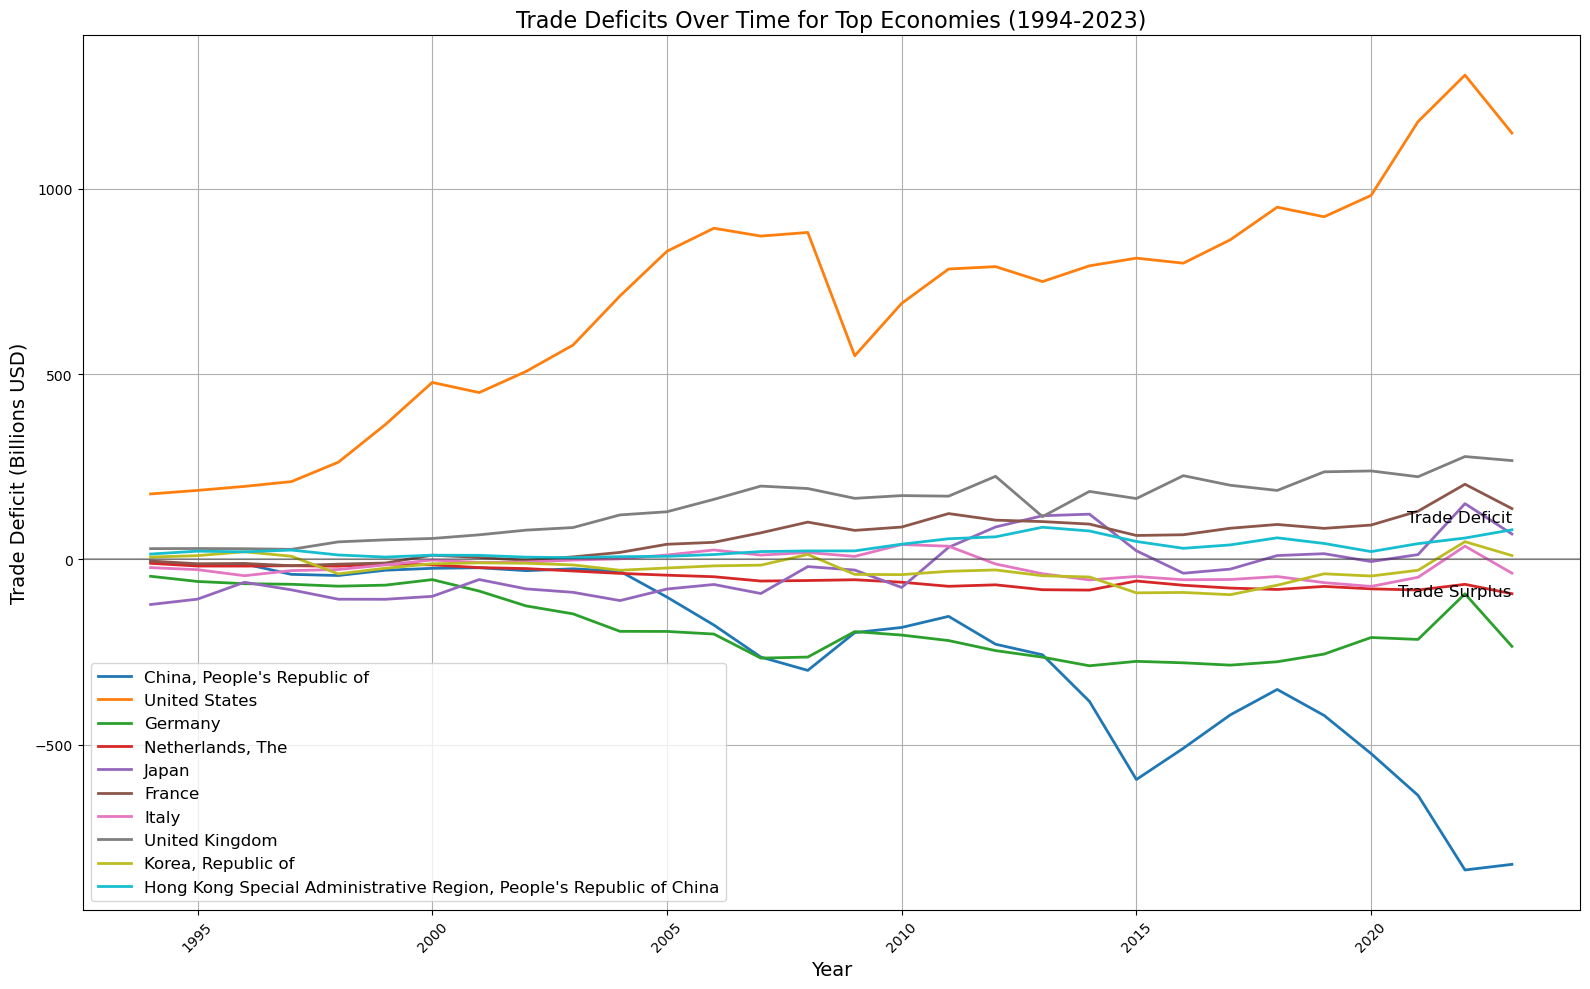

In [11]:
# Create a new figure with specified width and height for better readability
plt.figure(figsize=(16, 10))

# Loop through each of the top 10 economies and plot their trade deficit data across the years
for country in top_10_economies:
    plt.plot(deficits_by_year.index, deficits_by_year[country], label=country, linewidth=2)

# Draw a horizontal line at y=0 to distinguish between deficit (above) and surplus (below)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Add title to the plot
plt.title('Trade Deficits Over Time for Top Economies (1994-2023)', fontsize=16)

# Label the x-axis as 'Year'
plt.xlabel('Year', fontsize=14)

# Label the y-axis as 'Trade Deficit (Billions USD)'
plt.ylabel('Trade Deficit (Billions USD)', fontsize=14)

# Display legend to identify lines for each country
plt.legend(fontsize=12)

# Enable grid lines for better readability of the plot
plt.grid(True)

# Rotate x-axis tick labels for better visibility
plt.xticks(rotation=45)

# Add text label to indicate the 'Trade Deficit' region on the positive y-axis
plt.text(deficits_by_year.index[-1], 100, 'Trade Deficit', fontsize=12, ha='right')

# Add text label to indicate the 'Trade Surplus' region on the negative y-axis
plt.text(deficits_by_year.index[-1], -100, 'Trade Surplus', fontsize=12, ha='right')

# Automatically adjust subplot parameters for a neat layout
plt.tight_layout()

# Display the final plot
plt.show()


# Visualize Trade Deficits as Percentage of Total Trade

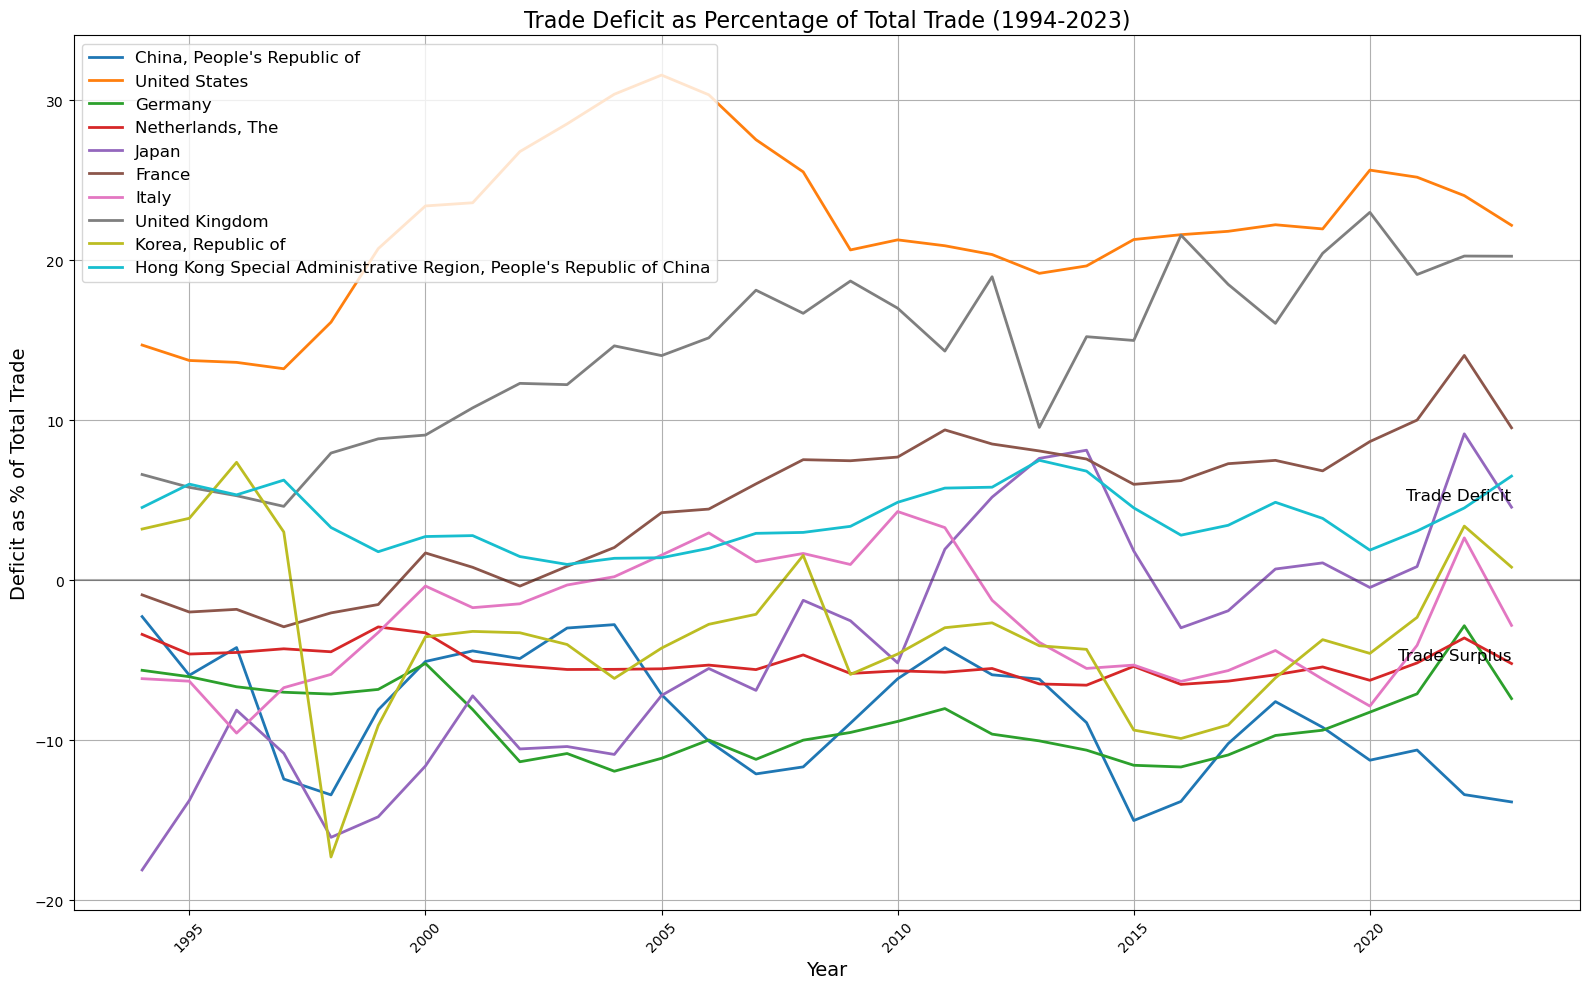

In [12]:
# Create a new figure with specified size for clear visualization
plt.figure(figsize=(16, 10))

# Loop through each top economy and plot its trade deficit as a percentage of total trade over time
for country in top_10_economies:
    plt.plot(deficit_pct_by_year.index, deficit_pct_by_year[country], label=country, linewidth=2)

# Add a horizontal reference line at 0% to separate deficit (above) and surplus (below) visually
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Set the title of the plot
plt.title('Trade Deficit as Percentage of Total Trade (1994-2023)', fontsize=16)

# Label the x-axis as 'Year'
plt.xlabel('Year', fontsize=14)

# Label the y-axis to indicate it's showing deficit as a percentage of total trade
plt.ylabel('Deficit as % of Total Trade', fontsize=14)

# Display a legend to distinguish between countries
plt.legend(fontsize=12)

# Enable grid lines to make the chart easier to read
plt.grid(True)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a text label to indicate the 'Trade Deficit' region on the positive y-axis
plt.text(deficit_pct_by_year.index[-1], 5, 'Trade Deficit', fontsize=12, ha='right')

# Add a text label to indicate the 'Trade Surplus' region on the negative y-axis
plt.text(deficit_pct_by_year.index[-1], -5, 'Trade Surplus', fontsize=12, ha='right')

# Adjust layout to prevent overlapping of plot elements
plt.tight_layout()

# Display the final plot
plt.show()


# Trade Deficit Comparison

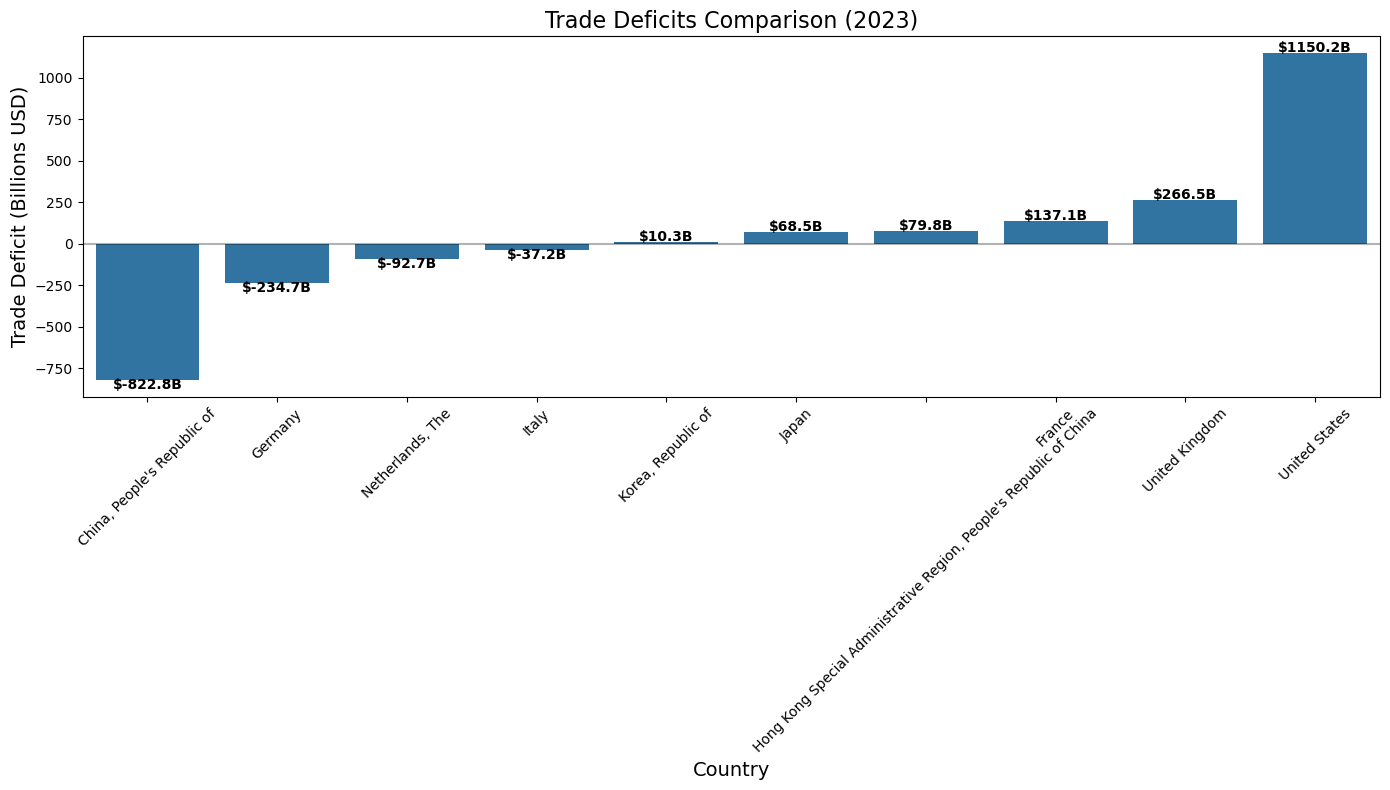

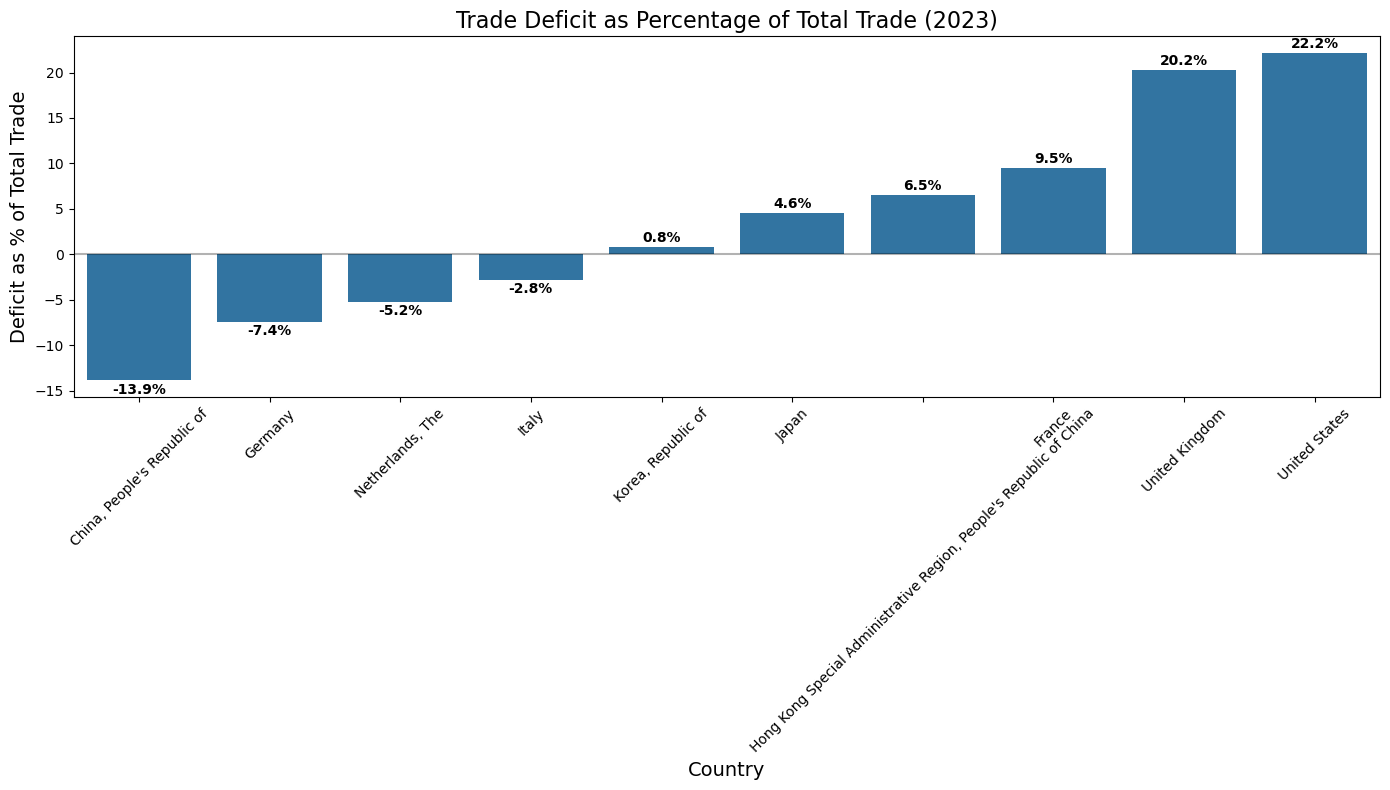

In [13]:
# Compare US with other economies in the most recent year

# Identify all years with at least some available trade deficit data (exclude years with all missing values)
valid_years = deficits_by_year.dropna(how='all').index

# Select the most recent year from the valid years
most_recent_valid_year = max(valid_years)

# Extract absolute trade deficit values for all countries in the most recent year and sort them for plotting
recent_deficits = deficits_by_year.loc[most_recent_valid_year].sort_values()

# Extract trade deficit as a percentage of total trade for the same year and sort
recent_deficit_pcts = deficit_pct_by_year.loc[most_recent_valid_year].sort_values()

# === Plot 1: Absolute Trade Deficit Comparison ===

# Create a bar chart to show trade deficit values in billions of USD
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=recent_deficits.index, y=recent_deficits.values)

# Add a horizontal line at y=0 to separate surplus (below) from deficit (above)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Set plot title and axis labels
plt.title(f'Trade Deficits Comparison ({most_recent_valid_year})', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Trade Deficit (Billions USD)', fontsize=14)

# Rotate country names on x-axis for better readability
plt.xticks(rotation=45)

# Annotate each bar with its corresponding value in billions (positive or negative)
for i, v in enumerate(recent_deficits.values):
    ax.text(i, v + (30 if v >= 0 else -30), f'${v:.1f}B', 
            ha='center', va='center', fontsize=10,
            color='black', fontweight='bold')

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

# === Plot 2: Trade Deficit as Percentage of Total Trade ===

# Create a bar chart to show trade deficit as a % of total trade
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=recent_deficit_pcts.index, y=recent_deficit_pcts.values)

# Add a horizontal line at y=0 to distinguish between surplus and deficit
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Set plot title and axis labels
plt.title(f'Trade Deficit as Percentage of Total Trade ({most_recent_valid_year})', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Deficit as % of Total Trade', fontsize=14)

# Rotate x-axis labels for clarity
plt.xticks(rotation=45)

# Annotate each bar with its corresponding percentage value
for i, v in enumerate(recent_deficit_pcts.values):
    ax.text(i, v + (1 if v >= 0 else -1), f'{v:.1f}%', 
            ha='center', va='center', fontsize=10,
            color='black', fontweight='bold')

# Final layout adjustment and show plot
plt.tight_layout()
plt.show()


# Conducting Bayesian Statistical Analysis

In [14]:
# Prepare data for Bayesian regression
# Define minimum years required for Bayesian modeling
min_years_required = 5  

# Use more countries from our top economies list
comparison_countries = [country for country in deficits_by_year.columns 
                       if country != 'Nigeria' and pd.notna(deficits_by_year[country]).sum() >= min_years_required]

# Limit to top 10 for clarity, but ensure US is included
if 'United States' in comparison_countries:
    us_index = comparison_countries.index('United States')
    comparison_countries.pop(us_index)
    comparison_countries = ['United States'] + comparison_countries

comparison_countries = comparison_countries[:10]  # Take top 10

print(f"Selected countries for Bayesian analysis: {comparison_countries}")

# Prepare data for PyMC models
model_data = {}

# Before running models, print data availability for each country
print("\nData availability for selected countries:")
for country in comparison_countries:
    # Extract deficit data and check availability
    if country in deficits_by_year.columns:
        deficit_data = deficits_by_year[country].dropna()
        print(f"{country}: {len(deficit_data)} years of data")
        
        # Skip countries with insufficient data
        if len(deficit_data) < min_years_required:
            print(f"  - Skipping {country} due to insufficient data")
            continue
        
        # Convert years to numeric time points (0, 1, 2, ...)
        years = deficit_data.index.astype(float)
        years_norm = (years - years.min()) / (years.max() - years.min())
        
        # Normalize deficit values for numerical stability
        deficit_mean = deficit_data.mean()
        
        # Handle the case where standard deviation is 0 or very small
        deficit_std = deficit_data.std()
        if deficit_std < 0.0001:  # Near-zero standard deviation
            print(f"  - Warning: {country} has near-zero standard deviation, using value of 1.0")
            deficit_std = 1.0
            
        deficit_norm = (deficit_data - deficit_mean) / deficit_std
        
        # Store data for modeling
        model_data[country] = {
            'years': years,
            'years_norm': years_norm.values.astype(float),
            'deficit_norm': deficit_norm.values.astype(float),
            'deficit_mean': deficit_mean,
            'deficit_std': deficit_std
        }
    else:
        print(f"{country}: No data available")

print(f"\nPrepared Bayesian analysis data for {len(model_data)} countries")

Preparing data for Bayesian analysis...
Selected countries for Bayesian analysis: ['United States', "China, People's Republic of", 'Germany', 'Netherlands, The', 'Japan', 'France', 'Italy', 'United Kingdom', 'Korea, Republic of', "Hong Kong Special Administrative Region, People's Republic of China"]

Data availability for selected countries:
United States: 30 years of data
China, People's Republic of: 30 years of data
Germany: 30 years of data
Netherlands, The: 30 years of data
Japan: 30 years of data
France: 30 years of data
Italy: 30 years of data
United Kingdom: 30 years of data
Korea, Republic of: 30 years of data
Hong Kong Special Administrative Region, People's Republic of China: 30 years of data

Prepared Bayesian analysis data for 10 countries


In [25]:
# Bayesian linear regression for each country
# Create a dictionary to store model results
model_results = {}

for country, data in model_data.items():
    print(f"Running Bayesian linear regression for {country}...")
    
    with pm.Model() as linear_model:
        # Priors
        alpha = pm.Normal('alpha', mu=0, sigma=10)
        beta = pm.Normal('beta', mu=0, sigma=10)
        sigma = pm.HalfNormal('sigma', sigma=1)
        
        # Linear model
        mu = alpha + beta * data['years_norm']
        
        # Likelihood
        likelihood = pm.Normal('likelihood', mu=mu, sigma=sigma, observed=data['deficit_norm'])
        
        # Sample
        trace = pm.sample(1000, tune=1000, return_inferencedata=True, progressbar=True)
    
    # Store results
    model_results[country] = {
        'trace': trace,
        'summary': az.summary(trace, var_names=["alpha", "beta", "sigma"])
    }
    
    # Display summary
    print(f"\nModel summary for {country}:")
    display(model_results[country]['summary'])


Initializing NUTS using jitter+adapt_diag...


Running Bayesian linear regression for United States...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.



Model summary for United States:


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha -1.497  0.159  -1.781   -1.193      0.004    0.003    1632.0    1556.0   
beta   2.996  0.270   2.509    3.501      0.007    0.005    1669.0    1456.0   
sigma  0.431  0.059   0.327    0.548      0.001    0.001    1982.0    1715.0   

       r_hat  
alpha    1.0  
beta     1.0  
sigma    1.0

Initializing NUTS using jitter+adapt_diag...


Running Bayesian linear regression for China, People's Republic of...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.



Model summary for China, People's Republic of:


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  1.492  0.160   1.204    1.810      0.004    0.004    1673.0    1831.0   
beta  -2.981  0.275  -3.517   -2.486      0.007    0.006    1630.0    1840.0   
sigma  0.447  0.063   0.334    0.564      0.001    0.001    1852.0    1851.0   

       r_hat  
alpha    1.0  
beta     1.0  
sigma    1.0

Initializing NUTS using jitter+adapt_diag...


Running Bayesian linear regression for Germany...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.



Model summary for Germany:


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  1.225  0.247   0.785    1.714      0.006    0.005    1754.0    2093.0   
beta  -2.451  0.431  -3.241   -1.653      0.010    0.008    1761.0    2005.0   
sigma  0.702  0.098   0.535    0.885      0.002    0.002    2110.0    1878.0   

       r_hat  
alpha    1.0  
beta     1.0  
sigma    1.0

Initializing NUTS using jitter+adapt_diag...


Running Bayesian linear regression for Netherlands, The...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.



Model summary for Netherlands, The:


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  1.545  0.129   1.299    1.783      0.003    0.002    1931.0    1958.0   
beta  -3.091  0.220  -3.523   -2.688      0.005    0.004    1836.0    2032.0   
sigma  0.357  0.051   0.270    0.452      0.001    0.001    2076.0    1545.0   

       r_hat  
alpha    1.0  
beta     1.0  
sigma    1.0

Initializing NUTS using jitter+adapt_diag...


Running Bayesian linear regression for Japan...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.



Model summary for Japan:


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha -1.248  0.252  -1.710   -0.769      0.006    0.005    1586.0    1716.0   
beta   2.494  0.431   1.721    3.341      0.011    0.009    1645.0    1693.0   
sigma  0.686  0.094   0.527    0.870      0.002    0.002    1800.0    1877.0   

       r_hat  
alpha    1.0  
beta     1.0  
sigma    1.0

Initializing NUTS using jitter+adapt_diag...


Running Bayesian linear regression for France...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.



Model summary for France:


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha -1.465  0.174  -1.777   -1.134      0.004    0.003    1710.0    1921.0   
beta   2.933  0.301   2.344    3.476      0.007    0.006    1731.0    1863.0   
sigma  0.480  0.067   0.367    0.607      0.001    0.001    2104.0    2258.0   

       r_hat  
alpha    1.0  
beta     1.0  
sigma    1.0

Initializing NUTS using jitter+adapt_diag...


Running Bayesian linear regression for Italy...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.



Model summary for Italy:


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  0.417  0.362  -0.261    1.076      0.009    0.006    1580.0    2075.0   
beta  -0.841  0.620  -2.033    0.326      0.015    0.011    1641.0    1662.0   
sigma  1.008  0.138   0.756    1.265      0.003    0.003    1886.0    1930.0   

       r_hat  
alpha    1.0  
beta     1.0  
sigma    1.0

Initializing NUTS using jitter+adapt_diag...


Running Bayesian linear regression for United Kingdom...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.



Model summary for United Kingdom:


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha -1.540  0.137  -1.789   -1.271      0.003    0.002    1647.0    1919.0   
beta   3.079  0.233   2.645    3.526      0.006    0.004    1640.0    2040.0   
sigma  0.375  0.053   0.278    0.472      0.001    0.001    1886.0    2238.0   

       r_hat  
alpha    1.0  
beta     1.0  
sigma    1.0

Initializing NUTS using jitter+adapt_diag...


Running Bayesian linear regression for Korea, Republic of...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.



Model summary for Korea, Republic of:


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  0.653  0.346   0.010    1.295      0.008    0.007    1763.0    1765.0   
beta  -1.294  0.589  -2.374   -0.197      0.014    0.012    1769.0    1808.0   
sigma  0.967  0.137   0.731    1.224      0.003    0.003    2054.0    1927.0   

       r_hat  
alpha    1.0  
beta     1.0  
sigma    1.0

Initializing NUTS using jitter+adapt_diag...


Running Bayesian linear regression for Hong Kong Special Administrative Region, People's Republic of China...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


/opt/anaconda3/envs/pymc_env/lib/python3.13/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.



Model summary for Hong Kong Special Administrative Region, People's Republic of China:


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha -1.140  0.281  -1.694   -0.633      0.007    0.005    1486.0    1494.0   
beta   2.282  0.478   1.350    3.123      0.012    0.009    1573.0    1653.0   
sigma  0.765  0.110   0.580    0.969      0.003    0.004    1980.0    1712.0   

       r_hat  
alpha    1.0  
beta     1.0  
sigma    1.0

# Generating Predictions and Comparing Trends

Countries with successful models:
['United States', "China, People's Republic of", 'Germany', 'Netherlands, The', 'Japan', 'France', 'Italy', 'United Kingdom', 'Korea, Republic of', "Hong Kong Special Administrative Region, People's Republic of China"]
Generating predictions for 10 countries:
- United States
- China, People's Republic of
- Germany
- Netherlands, The
- Japan
- France
- Italy
- United Kingdom
- Korea, Republic of
- Hong Kong Special Administrative Region, People's Republic of China


/var/folders/6b/f0htqk51389bs366vp7t51980000gn/T/ipykernel_16792/2319445147.py:51: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  pred_hdi = az.hdi(pred_samples, hdi_prob=0.95)
/var/folders/6b/f0htqk51389bs366vp7t51980000gn/T/ipykernel_16792/2319445147.py:51: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  pred_hdi = az.hdi(pred_samples, hdi_prob=0.95)
/var/folders/6b/f0htqk51389bs366vp7t51980000gn/T/ipykernel_16792/2319445147.py:51: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  pred_hdi = az.hdi(pred_samples, hdi_prob=0.95)
/var/folders/6b/f0htqk51389bs366vp7t51980000gn/T/ipykernel_16792/2319445147.py:51: FutureWarning: hdi currently interprets 2d data

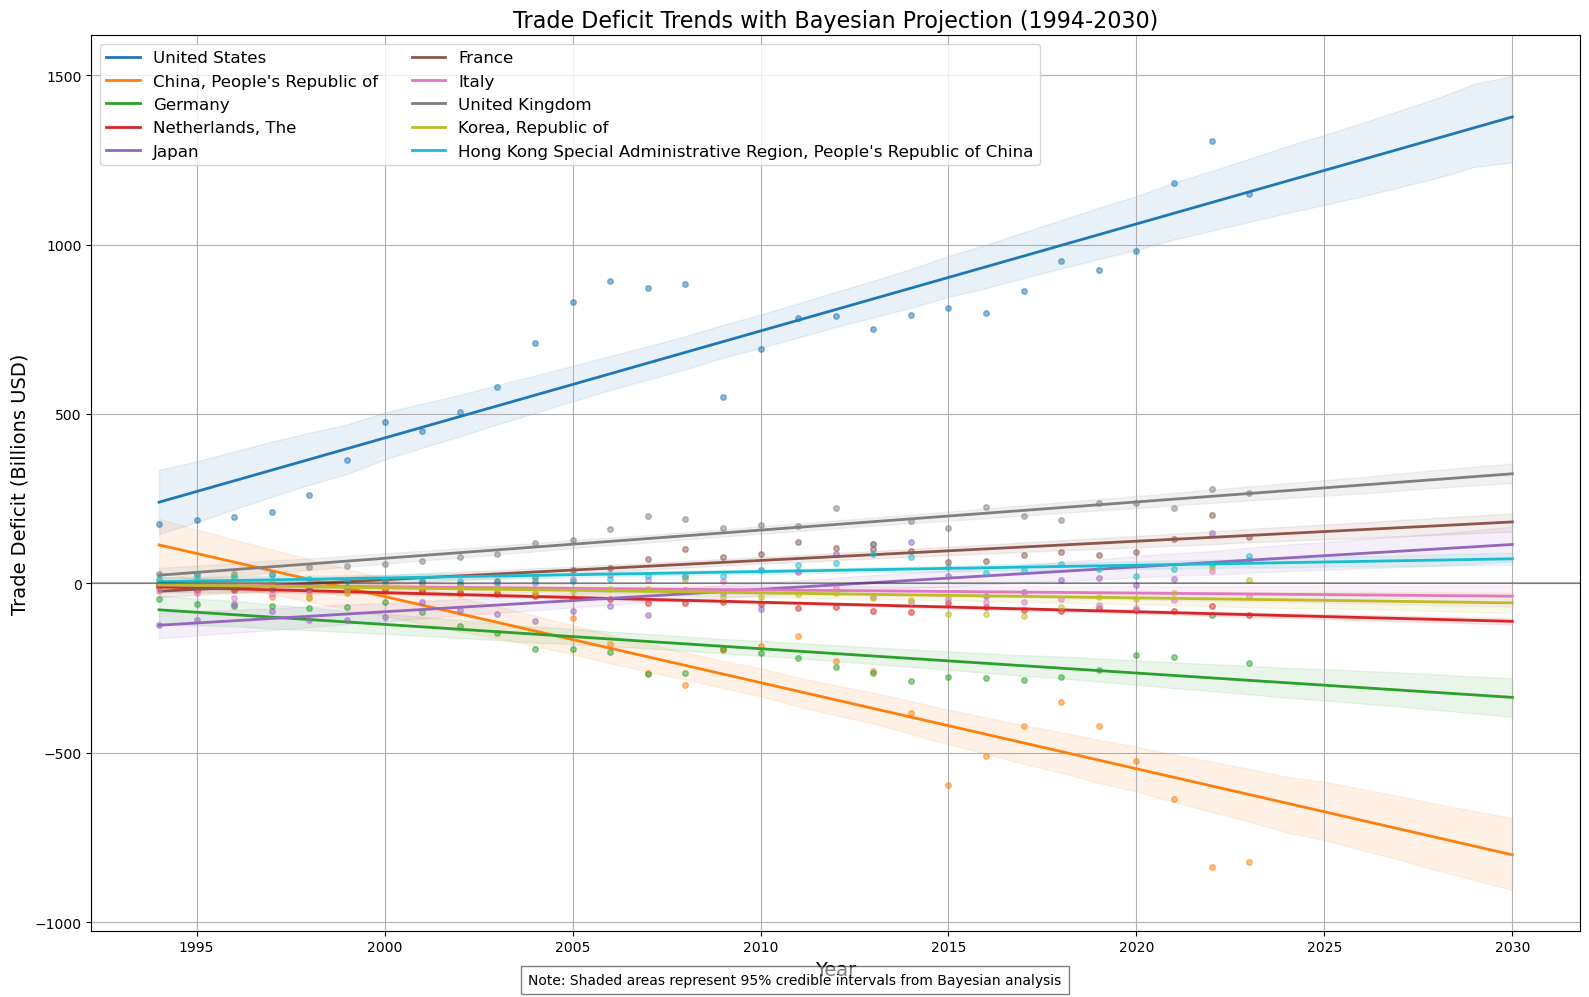

In [26]:
# Generate predictions and compare trends
# Generate predictions for each country
predictions = {}
prediction_years = np.linspace(1994, 2030, 37)  # Predict through 2030

# List the countries that we know have been successfully modeled
print("Countries with successful models:")
print(list(model_results.keys()))

# Use only the countries that have been successfully modeled
countries_to_plot = list(model_results.keys())

print(f"Generating predictions for {len(countries_to_plot)} countries:")
for country in countries_to_plot:
    print(f"- {country}")

# Create a color map for consistent colors
colors = plt.cm.tab10(np.linspace(0, 1, len(countries_to_plot)))
color_dict = {country: colors[i] for i, country in enumerate(countries_to_plot)}

plt.figure(figsize=(16, 10))

for i, country in enumerate(countries_to_plot):
    # Skip if country is not in model_data
    if country not in model_data:
        print(f"Warning: {country} is in model_results but not in model_data, skipping")
        continue
        
    data = model_data[country]
    
    # Normalize prediction years for this country
    pred_years_norm = (prediction_years - data['years'].min()) / (data['years'].max() - data['years'].min())
    
    # Extract posterior samples
    trace = model_results[country]['trace']
    alpha_samples = trace.posterior['alpha'].values.flatten()
    beta_samples = trace.posterior['beta'].values.flatten()
    
    # Generate predictions
    n_samples = len(alpha_samples)
    pred_samples = np.zeros((n_samples, len(prediction_years)))
    
    for j in range(n_samples):
        pred_samples[j] = alpha_samples[j] + beta_samples[j] * pred_years_norm
    
    # Denormalize
    pred_samples = (pred_samples * data['deficit_std']) + data['deficit_mean']
    
    # Calculate mean and HDI
    pred_mean = np.mean(pred_samples, axis=0)
    pred_hdi = az.hdi(pred_samples, hdi_prob=0.95)
    
    # Store predictions
    predictions[country] = {
        'years': prediction_years,
        'mean': pred_mean,
        'hdi_lower': pred_hdi[:, 0],
        'hdi_upper': pred_hdi[:, 1]
    }
    
    # Plot with consistent colors
    country_color = color_dict[country]
    # Plot actual data points
    plt.plot(data['years'], deficits_by_year[country].dropna(), 'o', 
             color=country_color, alpha=0.5, markersize=4)
    # Plot trend line
    plt.plot(prediction_years, pred_mean, '-', 
             color=country_color, linewidth=2, label=f"{country}")
    # Plot confidence intervals
    plt.fill_between(prediction_years, pred_hdi[:, 0], pred_hdi[:, 1], 
                    color=country_color, alpha=0.1)

plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title('Trade Deficit Trends with Bayesian Projection (1994-2030)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Trade Deficit (Billions USD)', fontsize=14)
plt.legend(fontsize=12, loc='best', ncol=2)  # Use 2 columns for legend to save space
plt.grid(True)

# Add a text box explaining the shaded areas
plt.figtext(0.5, 0.01, 
           "Note: Shaded areas represent 95% credible intervals from Bayesian analysis", 
           ha="center", fontsize=10, 
           bbox={"facecolor":"white", "alpha":0.5, "pad":5})

plt.tight_layout()
plt.show()

# Finding US deficit ranking 

US trade deficit rank over time:


rank  total_countries
Year                       
1994     1               10
1995     1               10
1996     1               10
1997     1               10
1998     1               10
1999     1               10
2000     1               10
2001     1               10
2002     1               10
2003     1               10
2004     1               10
2005     1               10
2006     1               10
2007     1               10
2008     1               10
2009     1               10
2010     1               10
2011     1               10
2012     1               10
2013     1               10
2014     1               10
2015     1               10
2016     1               10
2017     1               10
2018     1               10
2019     1               10
2020     1               10
2021     1               10
2022     1               10
2023     1               10

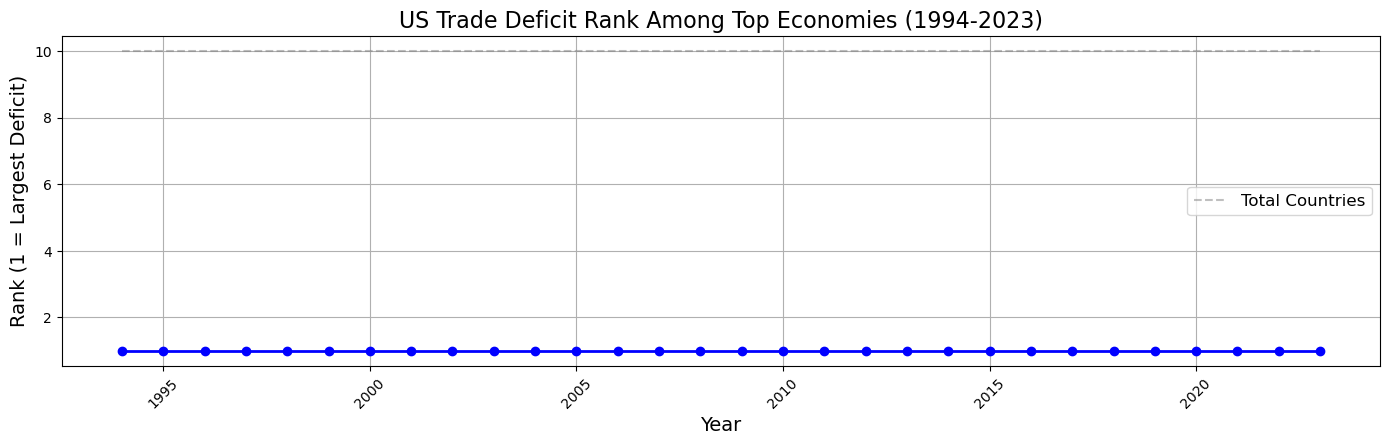

In [28]:
# Compute rank over time
# Calculate the rank of US deficit compared to other economies for each year
rank_by_year = {}

for year in deficits_by_year.index:
    year_data = deficits_by_year.loc[year].dropna()
    
    # Skip years with insufficient data
    if len(year_data) < 5 or 'United States' not in year_data:
        continue
    
    # Ensure Nigeria is excluded
    if 'Nigeria' in year_data:
        year_data = year_data.drop('Nigeria')
    
    # Rank countries by deficit (largest deficit = rank 1)
    sorted_countries = year_data.sort_values(ascending=False)
    countries_ranked = sorted_countries.index.tolist()
    
    # Get US rank
    us_rank = countries_ranked.index('United States') + 1
    us_percentile = (us_rank / len(countries_ranked)) * 100
    
    rank_by_year[year] = {
        'rank': us_rank,
        'total_countries': len(countries_ranked)
    }

# Create a DataFrame for the ranks
rank_df = pd.DataFrame(rank_by_year).T
rank_df.index.name = 'Year'
rank_df = rank_df.sort_index()

print("US trade deficit rank over time:")
display(rank_df)

# Plot US rank over time
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(rank_df.index, rank_df['rank'], 'o-', linewidth=2, color='blue')
plt.title('US Trade Deficit Rank Among Top Economies (1994-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rank (1 = Largest Deficit)', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)

# Add reference for total number of countries
plt.plot(rank_df.index, rank_df['total_countries'], '--', color='gray', alpha=0.5, label='Total Countries')
plt.legend(fontsize=12)



plt.tight_layout()
plt.show()

# Conclusion: US Trade Deficit Analysis

Our analysis confirms our original hypothesis, stating that the US trade deficit is by far the highest by percentage of total trade and by flat values at 22.2% and $1,150.18 billion (2023), respectively. The US has also been the country with the highest trade deficit for as far as our data set goes.

Other than China, there is no other economy or trade deficit/surplus that is similar to that of the United States. However, China's trade is in extreme surplus in contrast to the US being in extreme deficit. All other top economies have shown little change in deficit/surplus over the years.

From our analysis, we were unable to conclude how these changes in deficit will affect the US economy however, he statistical evidence is unambiguous: with a trend coefficient of 3.0060, the US deficit is projected to grow faster than other economies. With the stark contrast with China's $822.77 billion surplus, it can provide some texture as to why the US government might be implementing the tariffs. 

The US may be becoming increasingly reliant on foreign countries, while China supplies too much of the world. Government concerns about foreign dependency appear justified by the data, though the long-term economic impacts remain uncertain in an increasingly volatile trade policy environment. This also may reflect reasons for the harshest tariffs being on China and more lenient on other countries. 

While our model projects the US trade deficit to reach $1,378.77 billion by 2030, this forecast is complicated by recent tariff implementations and trade disputes that have introduced significant unpredictability into global trade relationships. These policy interventions may substantially alter deficit trajectories in ways historical data cannot anticipate.